# Import Modules

In [1]:
import pyFish
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.linalg

In [2]:
warnings.filterwarnings('ignore')

# Load Sample data

In [3]:
data = np.loadtxt('data/sample_vel_x_vel_y.csv', delimiter=',')
vel_x = pyFish.metrics().interploate_missing(data[:,0])
vel_y = pyFish.metrics().interploate_missing(data[:,1])
tint = 0.12

# Initialize object with parameters

In [4]:
sde = pyFish.Characterize(inc=0.01, inc_x=0.1, inc_y=0.1,t_lag=1000, simple_method=True, max_order=10, delta_t=1, fft=True)

# Analyse

In [5]:
out = sde([vel_x, vel_y],t=None,dt='auto',t_int=tint)
out

Gaussian check for underlying noise: 100%|██████████| 10000/10000 [00:00<00:00, 26158.76it/s]


In [6]:
out.data()

(array([[            nan,             nan,             nan,
                     nan,             nan,  2.76975575e-03,
          1.72136938e-02,  1.41340659e-02, -7.95994005e-03,
         -8.30377880e-03,  2.13411219e-02,  1.51390042e-02,
         -2.60651354e-02, -5.88481272e-02, -2.73078125e-02,
                     nan,             nan,             nan,
                     nan,             nan],
        [            nan,             nan,             nan,
                     nan,  5.83104607e-02,  5.03062267e-02,
          7.49304259e-02,  3.54431237e-02,  1.89774683e-03,
          1.71798476e-03, -6.82431424e-03, -2.44058594e-03,
         -1.54839140e-02, -5.06304108e-02, -7.02593198e-02,
         -7.00405521e-02,             nan,             nan,
                     nan,             nan],
        [            nan,             nan,  1.43762480e-01,
          7.82448302e-02,  7.93950962e-02,  5.87055857e-02,
          3.04720930e-02, -2.58492531e-04,  3.85600577e-02,
          7.

# View parameters

In [7]:
out.parameters()

{'t_lag': 1000,
 'simple_method': True,
 'max_order': 10,
 'inc': 0.01,
 'dt_': 'auto',
 'delta_t': 1,
 'order_metric': 'R2_adj',
 'fft': True,
 'inc_x': 0.1,
 'inc_y': 0.1,
 't_int': 0.12,
 'vector': True,
 'autocorrelation_time': 32.90204593550414,
 'drift_order': 1,
 'diff_order': 2,
 'dt': 32,
 'gaussian_noise': True,
 'k': -4.690426088412725,
 'l_lim': -46.71848091162423,
 'h_lim': 41.77119911664673}

# Visualize Output

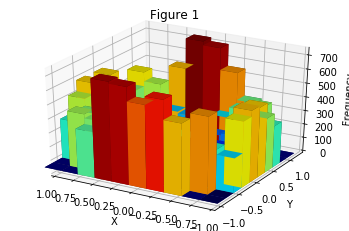

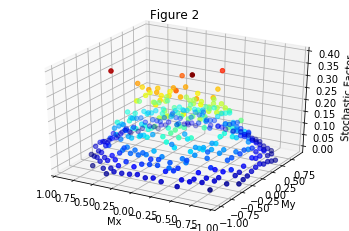

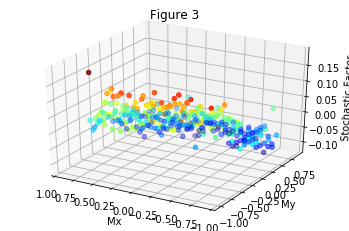

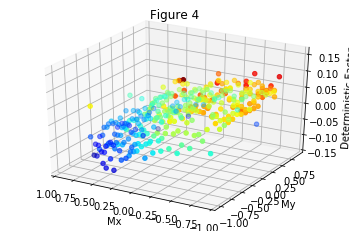

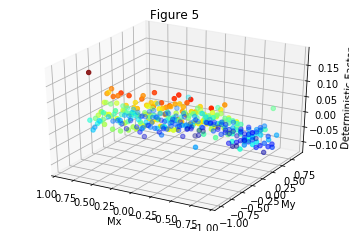

In [8]:
out.visualize()

# Diagnostics graphs

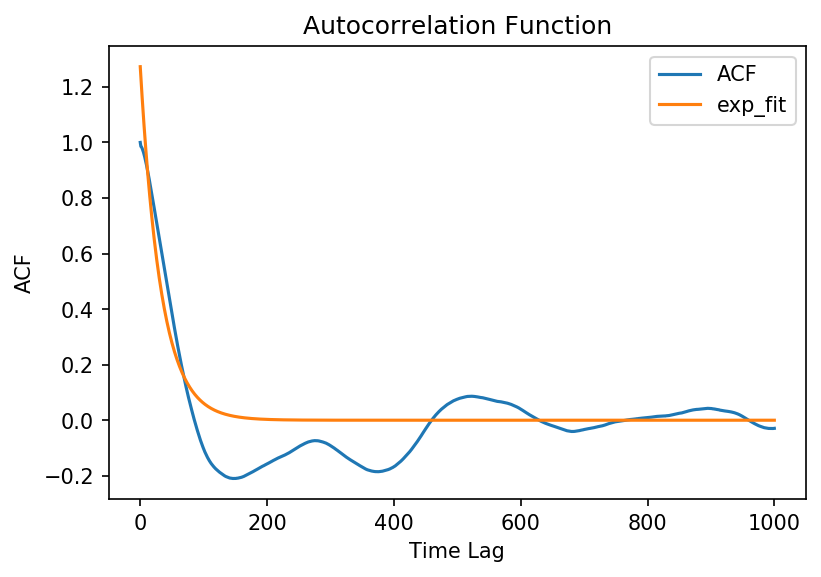

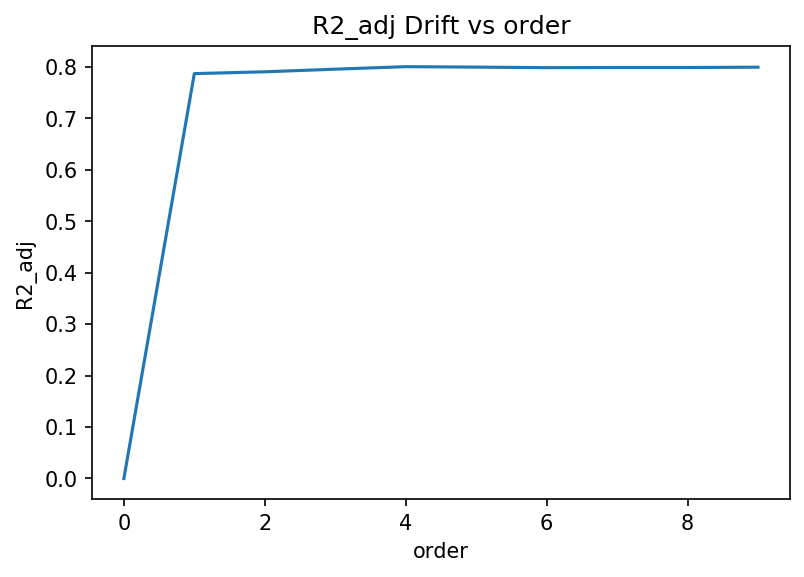

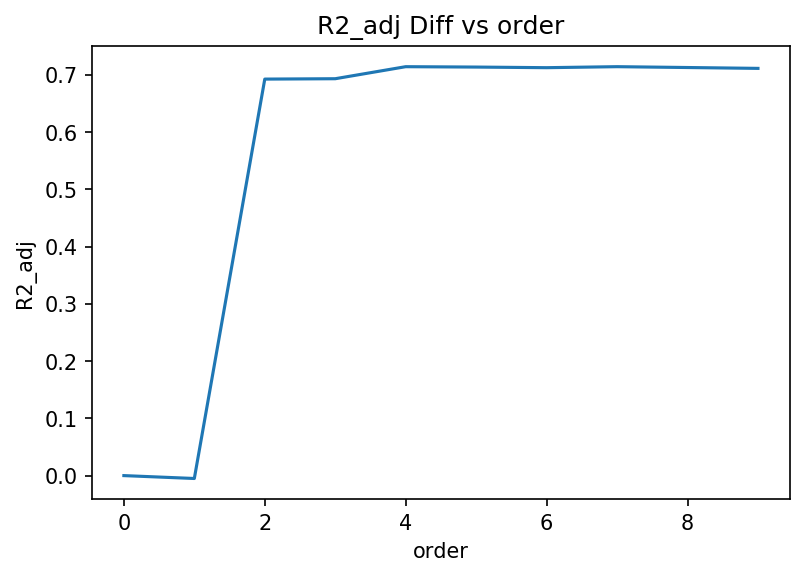

In [9]:
 out.diagnostic()

Noise is gaussian


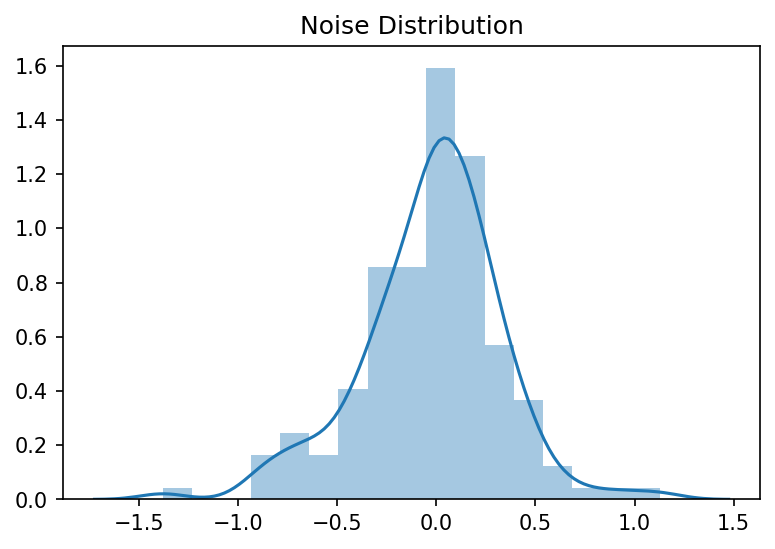

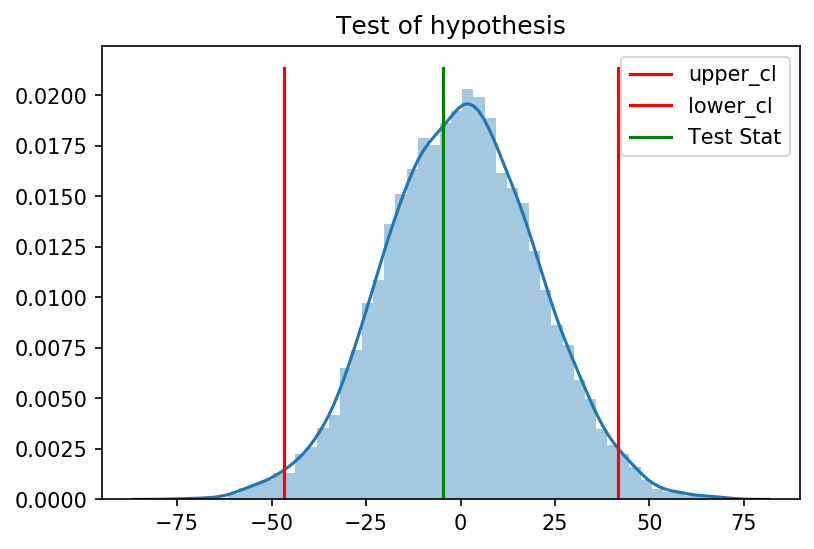

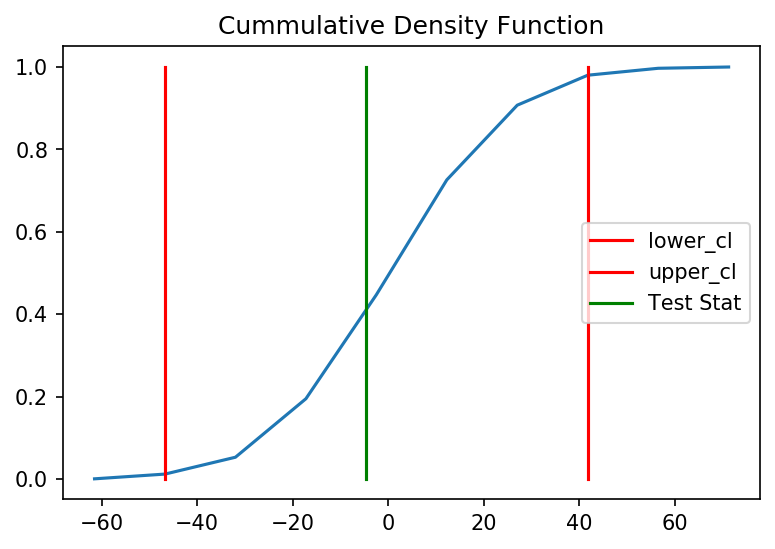

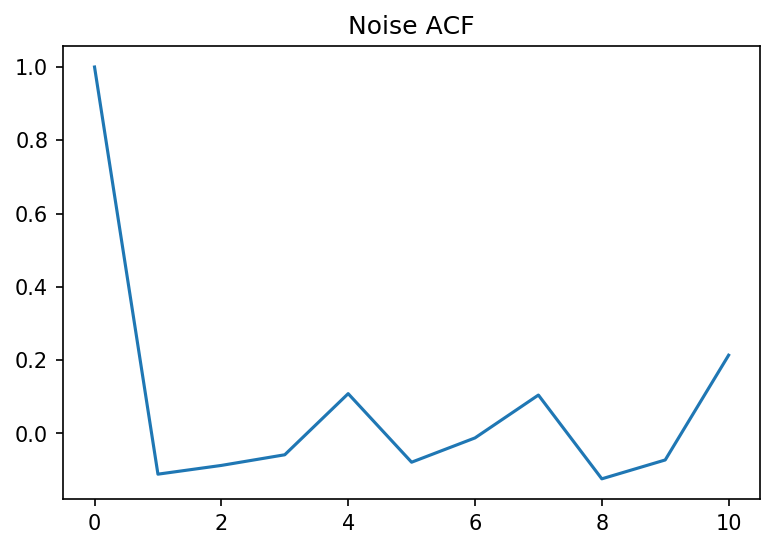

In [10]:
out.noise_characterstics()

Text(0.5, 0, 'Stochastic Factor')

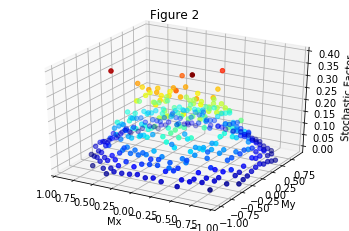

In [93]:
fig2 = plt.figure()
ax = fig2.add_subplot(projection="3d")
x = np.matlib.repmat(sde._op_x,len(sde._op_x),1)
x.ravel().sort()
y = np.matlib.repmat(sde._op_y, len(sde._op_y),1)
sde._avgdiffY[sde._avgdiffY==0] = np.nan
z = sde._avgdiffY
ax.scatter3D(x, y, z.ravel(), c=z.ravel(), cmap='jet');
plt.xlim([1,-1])
plt.title('Figure 2')
ax.set_xlabel('Mx')
ax.set_ylabel('My')
ax.set_zlabel('Stochastic Factor')

Text(0.5, 0, 'Stochastic Factor')

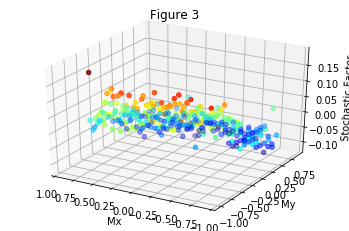

In [57]:
fig3 = plt.figure()
ax = fig3.add_subplot(projection="3d")
x = np.matlib.repmat(sde._op_x,len(sde._op_x),1)
x.ravel().sort()
y = np.matlib.repmat(sde._op_y, len(sde._op_y),1)
sde._avgdiffX[sde._avgdiffX==0] = np.nan
z = sde._avgdriftX
ax.scatter3D(x, y, z.ravel(), c=z.ravel(), cmap='jet');
plt.xlim([1,-1])
plt.title('Figure 3')
ax.set_xlabel('Mx')
ax.set_ylabel('My')
ax.set_zlabel('Stochastic Factor')

In [113]:
x = x[~np.isnan(z)]
y = y[~np.isnan(z)]
z = z[~np.isnan(z)]
data = np.array(list(zip(x,y,z)))

In [114]:
data

array([[-1.        , -0.5       ,  0.00578793],
       [-1.        , -0.4       ,  0.01233519],
       [-1.        , -0.3       ,  0.01634179],
       ...,
       [ 0.9       ,  0.2       ,  0.02549402],
       [ 0.9       ,  0.3       ,  0.03039562],
       [ 0.9       ,  0.4       ,  0.00206898]])

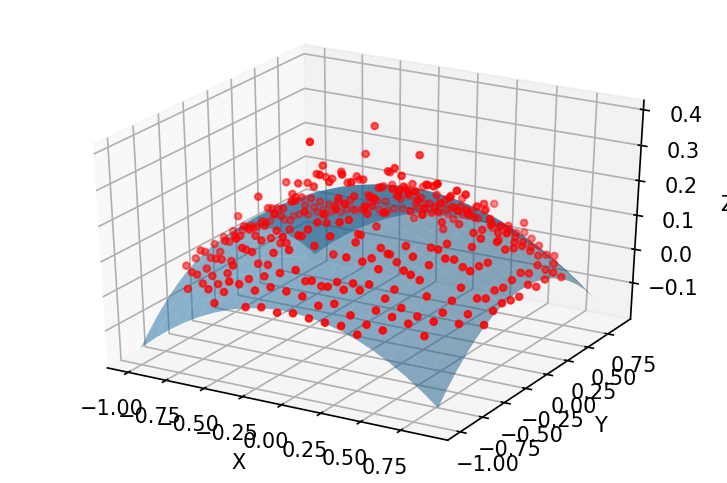

In [145]:
# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(-1.0, 1.0, 0.1), np.arange(-1.0, 1.0, 0.1))
XX = X.flatten()
YY = Y.flatten()

order = 2    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

# plot points and fitted surface
fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=10)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
#ax.axis('equal')
ax.axis('tight')
plt.show()

In [157]:
class plane:
    def __init__(self, coeff, order):
        self.coeff = coeff
        self.order = order
    def __call__(self,x, y):
        if self.order == 1:
            X = x.flatten()
            Y = y.flatten()
            return np.dot(np.c_[X, Y, np.ones(X.shape)], self.coeff).reshape(x.shape)
        elif order == 2:
            X = x.flatten()
            Y = y.flatten()
            return np.dot(np.c_[np.ones(X.shape), X, Y, X*Y, X**2, Y**2], self.coeff).reshape(x.shape)
    def __str__(self):
        str1 = """2D plane\nOrder: {}\nCoeff: {}""".format(self.order,self.coeff)
        return str1

In [158]:
p1 = plane(coeff=C, order=2)

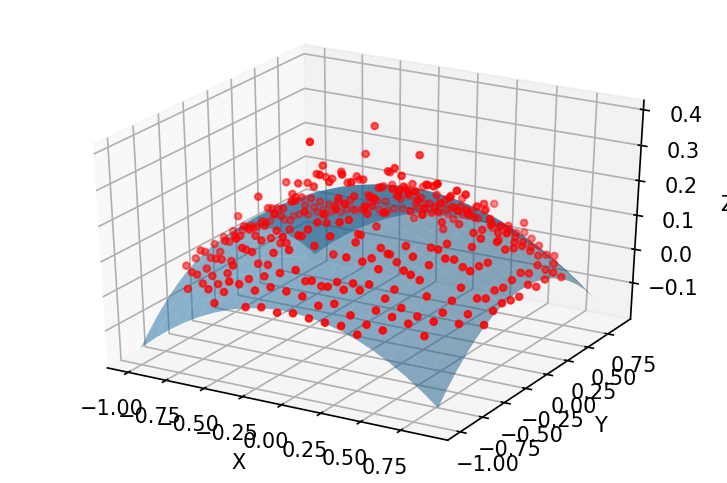

In [162]:
fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')
X = np.matlib.repmat(np.arange(-1,1,0.1), len(np.arange(-1,1,0.1)),1)
Y = np.matlib.repmat(np.arange(-1,1,0.1), len(np.arange(-1,1,0.1)),1)
Y.ravel().sort()
Z = p1(X,Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=10)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
#ax.axis('equal')
ax.axis('tight')
plt.show()